# Dataset and Dataloaders

> Datasets and Dataloaders


- skip_showdoc: true
- skip_exec: true

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        #data loading
        xy = np.loadtxt('Data/wine.csv', delimiter=",", dtype=np.float32, skiprows = 1)
        self.xy = xy
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

In [ ]:
dataset = WineDataset()


In [ ]:
first_data = dataset[0]
first_data

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
features, labels = dataset[0]
features, labels

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)

In [ ]:
next(dataiter)

[tensor([[1.2640e+01, 1.3600e+00, 2.0200e+00, 1.6800e+01, 1.0000e+02, 2.0200e+00,
          1.4100e+00, 5.3000e-01, 6.2000e-01, 5.7500e+00, 9.8000e-01, 1.5900e+00,
          4.5000e+02],
         [1.3240e+01, 2.5900e+00, 2.8700e+00, 2.1000e+01, 1.1800e+02, 2.8000e+00,
          2.6900e+00, 3.9000e-01, 1.8200e+00, 4.3200e+00, 1.0400e+00, 2.9300e+00,
          7.3500e+02],
         [1.1790e+01, 2.1300e+00, 2.7800e+00, 2.8500e+01, 9.2000e+01, 2.1300e+00,
          2.2400e+00, 5.8000e-01, 1.7600e+00, 3.0000e+00, 9.7000e-01, 2.4400e+00,
          4.6600e+02],
         [1.3160e+01, 3.5700e+00, 2.1500e+00, 2.1000e+01, 1.0200e+02, 1.5000e+00,
          5.5000e-01, 4.3000e-01, 1.3000e+00, 4.0000e+00, 6.0000e-01, 1.6800e+00,
          8.3000e+02]]),
 tensor([[2.],
         [1.],
         [2.],
         [3.]])]

In [ ]:
dataiter = iter(dataloader)

In [ ]:
data = next(dataiter)
features, labels = data

In [ ]:
features, labels 

(tensor([[1.3560e+01, 1.7100e+00, 2.3100e+00, 1.6200e+01, 1.1700e+02, 3.1500e+00,
          3.2900e+00, 3.4000e-01, 2.3400e+00, 6.1300e+00, 9.5000e-01, 3.3800e+00,
          7.9500e+02],
         [1.2000e+01, 3.4300e+00, 2.0000e+00, 1.9000e+01, 8.7000e+01, 2.0000e+00,
          1.6400e+00, 3.7000e-01, 1.8700e+00, 1.2800e+00, 9.3000e-01, 3.0500e+00,
          5.6400e+02],
         [1.2340e+01, 2.4500e+00, 2.4600e+00, 2.1000e+01, 9.8000e+01, 2.5600e+00,
          2.1100e+00, 3.4000e-01, 1.3100e+00, 2.8000e+00, 8.0000e-01, 3.3800e+00,
          4.3800e+02],
         [1.2220e+01, 1.2900e+00, 1.9400e+00, 1.9000e+01, 9.2000e+01, 2.3600e+00,
          2.0400e+00, 3.9000e-01, 2.0800e+00, 2.7000e+00, 8.6000e-01, 3.0200e+00,
          3.1200e+02]]),
 tensor([[1.],
         [2.],
         [2.],
         [2.]]))

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

total_samples, n_iterations

(178, 45)

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs:{inputs[0][:5]} labels:{labels[0]}')

epoch 1/2, step 5/45, inputs:tensor([ 13.2900,   1.9700,   2.6800,  16.8000, 102.0000]) labels:tensor([1.])
epoch 1/2, step 10/45, inputs:tensor([12.3600,  3.8300,  2.3800, 21.0000, 88.0000]) labels:tensor([3.])
epoch 1/2, step 15/45, inputs:tensor([12.3700,  1.6300,  2.3000, 24.5000, 88.0000]) labels:tensor([2.])
epoch 1/2, step 20/45, inputs:tensor([ 13.6800,   1.8300,   2.3600,  17.2000, 104.0000]) labels:tensor([1.])
epoch 1/2, step 25/45, inputs:tensor([14.8300,  1.6400,  2.1700, 14.0000, 97.0000]) labels:tensor([1.])
epoch 1/2, step 30/45, inputs:tensor([ 13.6900,   3.2600,   2.5400,  20.0000, 107.0000]) labels:tensor([3.])
epoch 1/2, step 35/45, inputs:tensor([12.0800,  1.8300,  2.3200, 18.5000, 81.0000]) labels:tensor([2.])
epoch 1/2, step 40/45, inputs:tensor([ 12.6400,   1.3600,   2.0200,  16.8000, 100.0000]) labels:tensor([2.])
epoch 1/2, step 45/45, inputs:tensor([12.0000,  1.5100,  2.4200, 22.0000, 86.0000]) labels:tensor([2.])
epoch 2/2, step 5/45, inputs:tensor([11.8200,

## Dataset Transform

### Types of Transform:

#### On Images:
> CenterCrop, Grayscale, Pad, RandomAffine RandomCrop, RandomHorizontalFlip, RandomRotation Resize, Scale

#### On Tensors:
> LinearTransformation, Normalize, RandomErasing

#### Conversion:
> ToPILImage: from tensor or ndarray

> ToTensor: from numpy.ndarray or PIL Image

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform = None):
        #data loading
        xy = np.loadtxt('Data/wine.csv', delimiter=",", dtype=np.float32, skiprows = 1)
        self.xy = xy
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

In [ ]:
class ToTensor():
    def __call__(self, sample):
        inputs, targets  = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target
        

In [ ]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])

In [ ]:
dataset = WineDataset(transform = composed)


In [ ]:
first_data = dataset[0]
first_data

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

In [ ]:
features, labels = dataset[0]
features, labels

(tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
         1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
         4.2600e+03]),
 tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)

In [ ]:
next(dataiter)

[tensor([[2.6340e+01, 1.0380e+01, 4.6400e+00, 4.4000e+01, 1.8600e+02, 3.4800e+00,
          1.2600e+00, 1.2200e+00, 3.1000e+00, 1.5800e+01, 1.2000e+00, 2.9600e+00,
          1.4500e+03],
         [2.7740e+01, 3.8000e+00, 5.6000e+00, 3.8800e+01, 2.1400e+02, 5.9000e+00,
          5.9400e+00, 7.4000e-01, 3.5200e+00, 9.0000e+00, 2.5000e+00, 6.8000e+00,
          1.8300e+03],
         [2.8380e+01, 3.1800e+00, 4.9600e+00, 3.3000e+01, 2.1600e+02, 6.6000e+00,
          7.8600e+00, 6.4000e-01, 3.7200e+00, 1.7400e+01, 2.4600e+00, 5.6400e+00,
          3.3600e+03],
         [2.3580e+01, 4.2600e+00, 5.5600e+00, 5.7000e+01, 1.8400e+02, 4.2600e+00,
          4.4800e+00, 1.1600e+00, 3.5200e+00, 6.0000e+00, 1.9400e+00, 4.8800e+00,
          9.3200e+02]]),
 tensor([[3.],
         [1.],
         [1.],
         [2.]])]

In [ ]:
dataiter = iter(dataloader)

In [ ]:
data = next(dataiter)
features, labels = data

In [ ]:
features, labels 

(tensor([[2.7640e+01, 3.5000e+00, 4.8400e+00, 2.8000e+01, 2.2200e+02, 7.7600e+00,
          7.4800e+00, 6.4000e-01, 3.7400e+00, 1.4100e+01, 2.0200e+00, 6.5200e+00,
          2.3800e+03],
         [2.7120e+01, 3.4200e+00, 4.6200e+00, 3.2400e+01, 2.3400e+02, 6.3000e+00,
          6.5800e+00, 6.8000e-01, 4.6800e+00, 1.2260e+01, 1.9000e+00, 6.7600e+00,
          1.5900e+03],
         [2.6980e+01, 3.3200e+00, 4.4800e+00, 4.8000e+01, 1.7400e+02, 3.7600e+00,
          3.6800e+00, 5.4000e-01, 2.0600e+00, 7.4800e+00, 1.9600e+00, 5.5600e+00,
          9.4400e+02],
         [2.5680e+01, 5.9200e+00, 5.2200e+00, 4.8000e+01, 2.0200e+02, 4.6400e+00,
          1.2000e+00, 1.0600e+00, 1.6200e+00, 9.8400e+00, 1.7800e+00, 4.3000e+00,
          1.1800e+03]]),
 tensor([[1.],
         [1.],
         [2.],
         [3.]]))

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

total_samples, n_iterations

(178, 45)

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs:{inputs[0][:5]} labels:{labels[0]}')

epoch 1/2, step 5/45, inputs:tensor([ 24.5800,   2.8200,   3.9600,  32.0000, 170.0000]) labels:tensor([2.])
epoch 1/2, step 10/45, inputs:tensor([ 25.5800,   5.3400,   4.9600,  44.0000, 224.0000]) labels:tensor([3.])
epoch 1/2, step 15/45, inputs:tensor([ 28.1200,   3.2600,   4.5600,  32.0000, 252.0000]) labels:tensor([1.])
epoch 1/2, step 20/45, inputs:tensor([ 26.4800,   5.1800,   5.7400,  42.0000, 236.0000]) labels:tensor([1.])
epoch 1/2, step 25/45, inputs:tensor([ 26.8200,   7.6800,   4.2400,  37.6000, 180.0000]) labels:tensor([1.])
epoch 1/2, step 30/45, inputs:tensor([ 26.9600,   3.6200,   4.8200,  41.0000, 200.0000]) labels:tensor([1.])
epoch 1/2, step 35/45, inputs:tensor([ 27.6600,   3.3000,   5.2000,  34.4000, 188.0000]) labels:tensor([1.])
epoch 1/2, step 40/45, inputs:tensor([ 25.5400,   6.8600,   3.9600,  32.0000, 160.0000]) labels:tensor([2.])
epoch 1/2, step 45/45, inputs:tensor([ 26.2200,   2.0200,   3.4000,  30.0000, 156.0000]) labels:tensor([2.])
epoch 2/2, step 5/45

In [ ]:
from torchvision import datasets

In [ ]:
datasets.__all__


('LSUN',
 'LSUNClass',
 'ImageFolder',
 'DatasetFolder',
 'FakeData',
 'CocoCaptions',
 'CocoDetection',
 'CIFAR10',
 'CIFAR100',
 'EMNIST',
 'FashionMNIST',
 'QMNIST',
 'MNIST',
 'KMNIST',
 'StanfordCars',
 'STL10',
 'SUN397',
 'SVHN',
 'PhotoTour',
 'SEMEION',
 'Omniglot',
 'SBU',
 'Flickr8k',
 'Flickr30k',
 'Flowers102',
 'VOCSegmentation',
 'VOCDetection',
 'Cityscapes',
 'ImageNet',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'WIDERFace',
 'SBDataset',
 'VisionDataset',
 'USPS',
 'Kinetics',
 'HMDB51',
 'UCF101',
 'Places365',
 'Kitti',
 'INaturalist',
 'LFWPeople',
 'LFWPairs',
 'KittiFlow',
 'Sintel',
 'FlyingChairs',
 'FlyingThings3D',
 'HD1K',
 'Food101',
 'DTD',
 'FER2013',
 'GTSRB',
 'CLEVRClassification',
 'OxfordIIITPet',
 'PCAM',
 'Country211',
 'FGVCAircraft',
 'EuroSAT',
 'RenderedSST2',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'CarlaStereo',
 'Middlebury2014Stereo',
 'CREStereo',
 'FallingThingsStereo',
 'SceneFlowStereo',
 'SintelStereo',
 'InStereo2k',
 'ETH3DStereo',


## MNIST


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torch

In [ ]:
torch.cuda.is_available() 

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:

path = './Data'
# Define transforms for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize image pixel values to range [-1, 1]
])

# Define batch size for data loader
batch_size = 64

# Create train and test datasets
train_dataset = MNIST(root=path, train=True, download=True, transform=transform)
test_dataset = MNIST(root=path, train=False, download=True, transform=transform)

# Create train and test data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

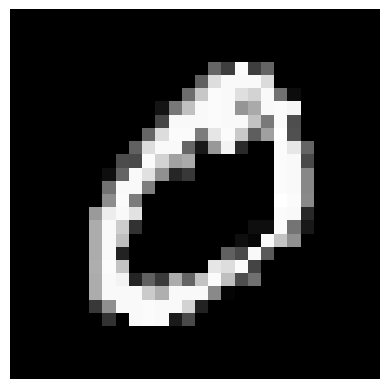

In [ ]:
image, label = train_dataset[1]
plt.imshow(transforms.ToPILImage()(image), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
examples = iter(train_loader)

In [ ]:
images, labels = next(examples)
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

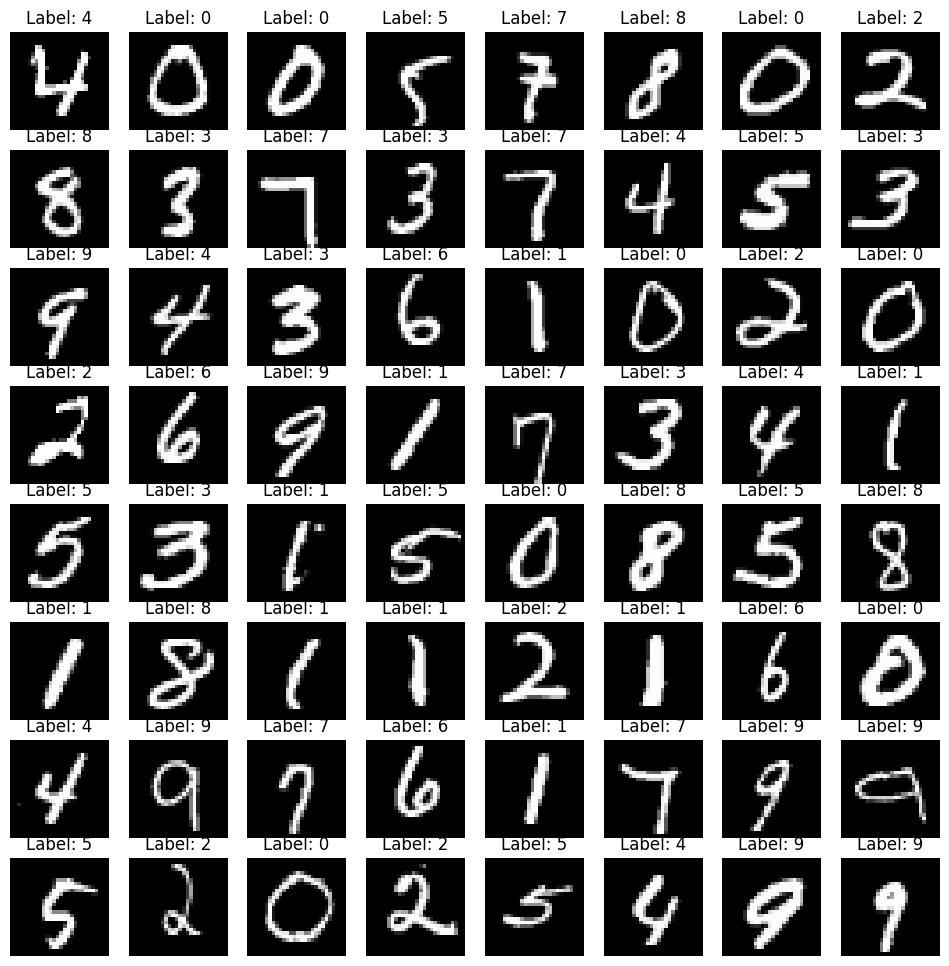

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images
def show_images(images, labels, nrows=8, ncols=8):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        # Convert image to numpy array and adjust pixel values
        img_np = images[i]
        img_np = (img_np + 1) / 2  # Adjust pixel values to range [0, 1]
        
        # Display image
        ax.imshow(img_np[0], cmap = 'gray')
        ax.axis('off')
        ax.set_title(f'Label: {labels[i]}')
    plt.show()

show_images(images, labels)

## Cifar10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np

import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader


In [ ]:
torch.cuda.is_available() 

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:


# Define transforms for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),                       # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5),       # Normalize image pixel values to range [-1, 1]
                         (0.5, 0.5, 0.5))
])

# Define batch size for data loader
batch_size = 64

# Create train and test datasets
train_dataset = CIFAR10(root=path, train=True, download=True, transform=transform)
test_dataset = CIFAR10(root=path, train=False, download=True, transform=transform)

# Create train and test data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [ ]:
images, labels = train_dataset[1]

In [ ]:
type(labels)

int

In [ ]:
classes = train_dataset.class_to_idx

In [ ]:
classes = list(train_dataset.class_to_idx)

In [ ]:
list(classes)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images
def show_images(images, labels, nrows=8, ncols=8):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        # Convert image to numpy array and adjust pixel values
        img_np = images[i].numpy().transpose((1, 2, 0))
        img_np = (img_np + 1) / 2  # Adjust pixel values to range [0, 1]
        
        # Display image
        ax.imshow(img_np)
        ax.axis('off')
        ax.set_title(f'Label: {labels[i]}')
    plt.show()

In [ ]:
# Get a batch of images and labels from the data loader
examples = iter(train_loader)
images, labels = next(examples)

In [ ]:
type(labels)

torch.Tensor

In [ ]:
images.shape, labels.shape


(torch.Size([64, 3, 32, 32]), torch.Size([64]))

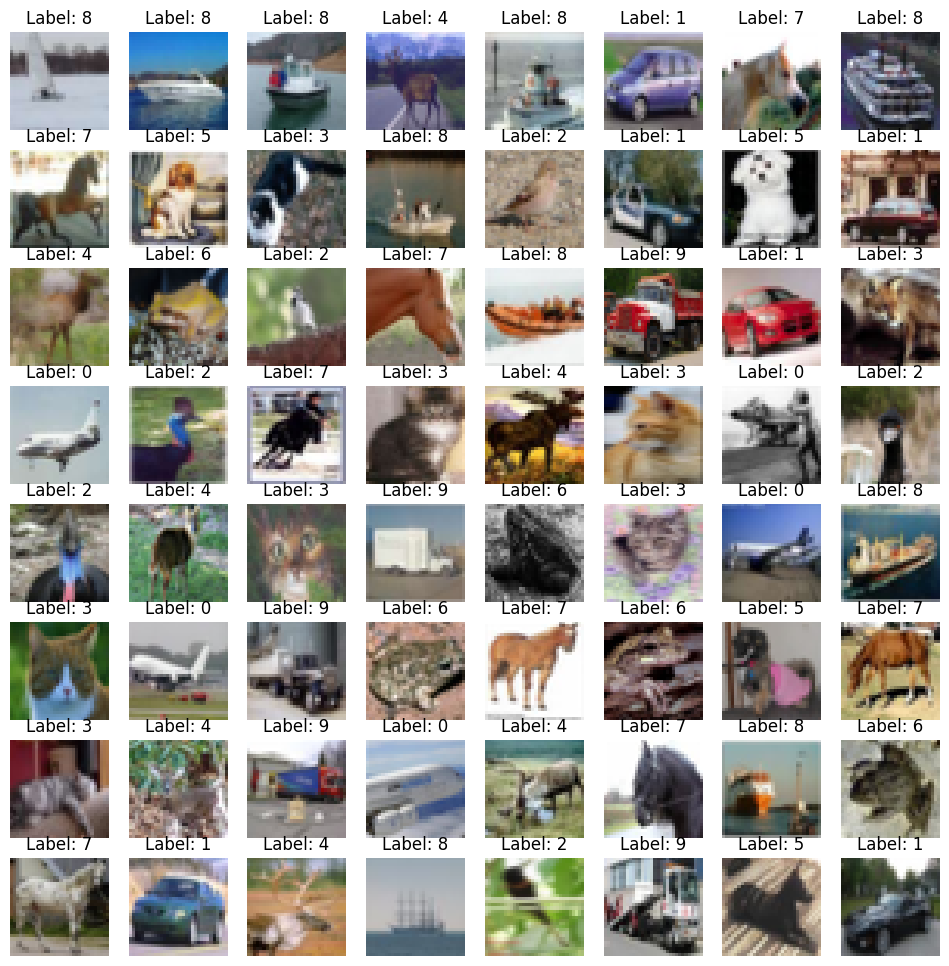

In [ ]:
# Display the images
show_images(images, labels)

## Kitti

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Create a histogram plot
output_notebook()

Loading BokehJS ...

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToPILImage, v2
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
import torch
from torchvision import transforms, datasets
from torchvision.datasets import Kitti, VisionDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
import cv2

In [ ]:
from torch.nn.utils.rnn import pad_sequence

In [ ]:
class Kitti_v2(Kitti):
    def __init__(self, *args, **kwargs):
        super(Kitti_v2, self).__init__(*args, **kwargs)

In [ ]:
path = './Data'
batch_size = 16

# Define transforms
# Define transforms for the dataset
transform2 = v2.Compose(
    [
        v2.ToImage(),
        # v2.Resize(size = desired_size),  # Resize image
        v2.RandomPhotometricDistort(p=0.2),
        # v2.RandomZoomOut(fill={tv_tensors.Image: (123, 117, 104), "others": 0}),
        # # v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(p=0.4),
        # # v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

In [ ]:
# Load KITTI train dataset
train_dataset = Kitti_v2(root=path, train='true', download=True, transform=transform2)

# Load KITTI test dataset
test_dataset = Kitti_v2(root=path, train='false', download=True, transform=transform2)

In [ ]:
sample = train_dataset[1000]
img, target = sample
print(f"{type(img) = }\n{type(target) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'list'>


In [ ]:
train_dataset2 = datasets.wrap_dataset_for_transforms_v2(train_dataset, target_keys=("boxes", "labels"))

test_dataset2 = datasets.wrap_dataset_for_transforms_v2(test_dataset, target_keys=("boxes", "labels"))

In [ ]:
sample = train_dataset2[1000]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>


In [ ]:
batch_size = 8

train_loader = DataLoader(train_dataset2,
                          batch_size=batch_size,
                          shuffle=True,
                          collate_fn=lambda batch: tuple(zip(*batch)),
                          num_workers = 8)

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset2,
                         batch_size=batch_size,
                         shuffle=False,
                         collate_fn=lambda batch: tuple(zip(*batch)),
                         num_workers = 8)

In [ ]:
train_dataset

Dataset Kitti_v2
    Number of datapoints: 7481
    Root location: ./Data

In [ ]:
len(train_dataset)

7481

In [ ]:
image, targets = train_dataset[2]
type(targets)

list

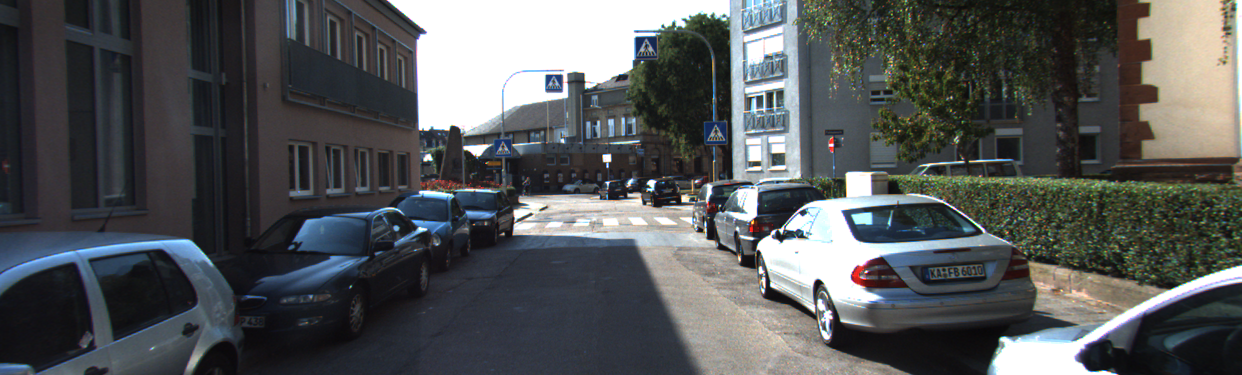

In [ ]:
image

In [ ]:
car_types = ['Car', 'Van', 'DontCare',
             'Cyclist', 'Pedestrian', 'Truck',
             'Tram', 'Misc', 'Person_sitting']

In [ ]:
def cv2_show(image_np, label):
    image_cv2 = cv2.cvtColor((image_np * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    if 'scores' in label:
        for bbox, item, score in zip(label['boxes'], label['labels'], label['scores']):
            if score > 0.2:
                cv2.rectangle(image_cv2,
                              (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),
                              (0, 255, 0), 2)
            
                # Display the label
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image_cv2, str(item),
                            (int(bbox[0]), int(bbox[1]) - 10),
                            font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    else:
        for bbox, item in zip(label['boxes'], label['labels']):
            # Draw the bounding box
            cv2.rectangle(image_cv2,
                          (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),
                          (0, 255, 0), 2)
        
            # Display the label
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(image_cv2, str(item),
                        (int(bbox[0]), int(bbox[1]) - 10),
                        font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Convert the image back to RGB format for display with Matplotlib
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    
    return image_rgb

def show_image(kitti_dataset):
    # Access an image and its label from the dataset
    image, label = kitti_dataset
    
    # Convert the image tensor to a NumPy array
    image_np = image.numpy().transpose((1, 2, 0))
    image_rgb = cv2_show(image_np, label)
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Define a function to display images
def show_images(images, labels, **kwargs):
    nrows = int(math.sqrt(len(images)))
    ncols = int(np.floor(len(images)/nrows))
        
    fig, axes = plt.subplots(nrows, ncols, **kwargs)
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    # Display the image using Matplotlib
    for ax, image, label in zip(axes.flat, images, labels):
        # Convert image to numpy array and adjust pixel values
        image_np = image.numpy().transpose((1, 2, 0))
        image_rgb = cv2_show(image_np, label)
        
        # Display image
        ax.imshow(image_rgb)
        ax.axis('off')

    for ax in axes.flat[len(images):]:
        ax.axis('off')
    plt.show()

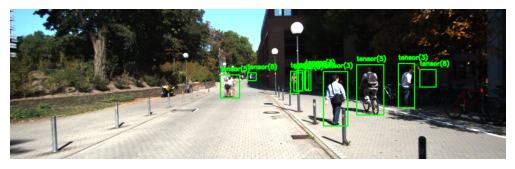

In [ ]:
image, label = train_dataset2[18]
show_image(train_dataset2[18])

### Iter

In [ ]:
# Get a batch of images and labels from the data loader
examples = iter(train_loader)
images, labels = next(examples)


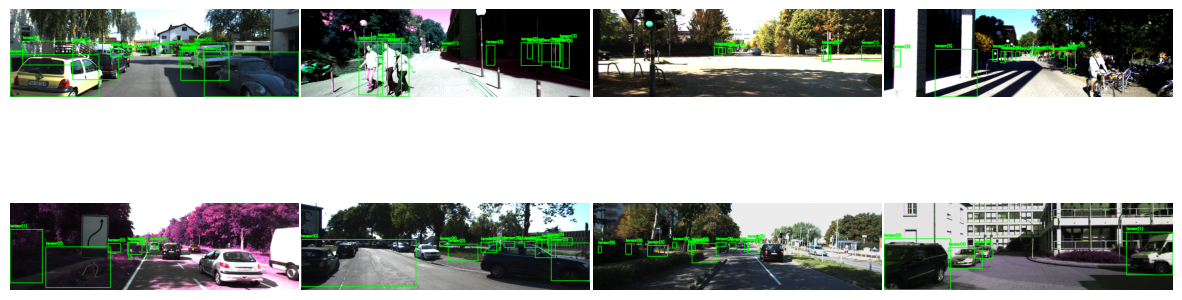

In [ ]:
show_images(images, labels, figsize=(15, 5))

## Cityscapes

## COCO

### Data download

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

#
# Only the required images will be downloaded (if necessary).
# By default, only detections are loaded
#

In [ ]:
dataset = foz.load_zoo_dataset(
    name="coco-2017",
    dataset_dir= "Data/coco",
    splits=["validation","train"],
    classes=["person", "car"],
    max_samples=50,
)

Found annotations at 'Data/coco/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Found annotations at 'Data/coco/raw/instances_train2017.json'
Sufficient images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'coco-2017-validation-train-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [ ]:
# Visualize the dataset in the FiftyOne App
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.8

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [ ]:
classses = dataset.default_classes

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Create a histogram plot
output_notebook()

Loading BokehJS ...

### Dataset and DataLoaders

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import models, datasets, tv_tensors, transforms
from torchvision.transforms import v2, ToPILImage
from torchvision.datasets import VisionDataset, CocoDetection

import torch.utils.data
from torch.utils.data import DataLoader

In [ ]:
from tqdm import tqdm
import cv2
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
train_path = './Data/coco/train'
val_path = './Data/coco/validation'

# Define transforms
# Define transforms for the dataset
transform2 = v2.Compose(
    [
        v2.ToImage(),
        # v2.Resize(size = desired_size),  # Resize image
        # v2.RandomPhotometricDistort(p=0.2),
        # v2.RandomZoomOut(fill={tv_tensors.Image: (123, 117, 104), "others": 0}),
        # # v2.RandomIoUCrop(),
        # v2.RandomHorizontalFlip(p=0.4),
        # # v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

In [ ]:
# Load KITTI train dataset
train_dataset = CocoDetection(root=f'{train_path}/data',
                              annFile=f'{train_path}/labels.json', 
                              transform = transform2)

# Load KITTI test dataset
test_dataset =CocoDetection(root=f'{val_path}/data',
                            annFile=f'{val_path}/labels.json',
                            transform=transform2)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
sample = train_dataset[49]
img, target = sample
print(f"{type(img) = }\n{type(target) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'list'>


In [ ]:
train_dataset2 = datasets.wrap_dataset_for_transforms_v2(train_dataset)

test_dataset2 = datasets.wrap_dataset_for_transforms_v2(test_dataset)

In [ ]:
len(train_dataset2), len(test_dataset2)

(50, 50)

In [ ]:
batch_size = 2

train_loader = DataLoader(train_dataset2,
                          batch_size=batch_size,
                          shuffle=True,
                          collate_fn=lambda batch: tuple(zip(*batch)),
                          num_workers = 8)

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset2,
                         batch_size=batch_size,
                         shuffle=False,
                         collate_fn=lambda batch: tuple(zip(*batch)),
                         num_workers = 8)

In [ ]:
sample = train_dataset2[10]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['image_id', 'boxes', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>


In [ ]:
def cv2_show(image_np, label):
    image_cv2 = cv2.cvtColor((image_np * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    if 'scores' in label:
        for bbox, item, score in zip(label['boxes'], label['labels'], label['scores']):
            if score > 0.2:
                cv2.rectangle(image_cv2,
                              (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),
                              (0, 255, 0), 2)
            
                # Display the label
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image_cv2, str(item),
                            (int(bbox[0]), int(bbox[1]) - 10),
                            font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    else:
        for bbox, item in zip(label['boxes'], label['labels']):
            # Draw the bounding box
            cv2.rectangle(image_cv2,
                          (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])),
                          (0, 255, 0), 2)
        
            # Display the label
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(image_cv2, classses[item],
                        (int(bbox[0]), int(bbox[1]) - 10),
                        font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    # Convert the image back to RGB format for display with Matplotlib
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    
    return image_rgb

def show_image(kitti_dataset):
    # Access an image and its label from the dataset
    image, label = kitti_dataset
    
    # Convert the image tensor to a NumPy array
    image_np = image.numpy().transpose((1, 2, 0))
    image_rgb = cv2_show(image_np, label)
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Define a function to display images
def show_images(images, labels, **kwargs):
    nrows = int(math.sqrt(len(images)))
    ncols = int(np.floor(len(images)/nrows))
        
    fig, axes = plt.subplots(nrows, ncols, **kwargs)
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    # Display the image using Matplotlib
    for ax, image, label in zip(axes.flat, images, labels):
        # Convert image to numpy array and adjust pixel values
        image_np = np.asarray(image).transpose((1, 2, 0))
        image_rgb = cv2_show(image_np, label)
        
        # Display image
        ax.imshow(image_rgb)
        ax.axis('off')

    for ax in axes.flat[len(images):]:
        ax.axis('off')
    plt.show()

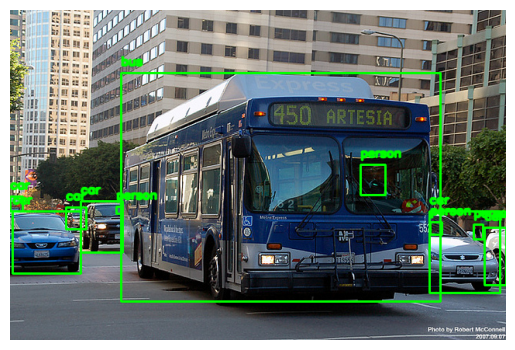

In [ ]:
show_image(train_dataset2[18])

#### Iter

In [ ]:
# Get a batch of images and labels from the data loader
examples = iter(train_loader)
images, labels = next(examples)


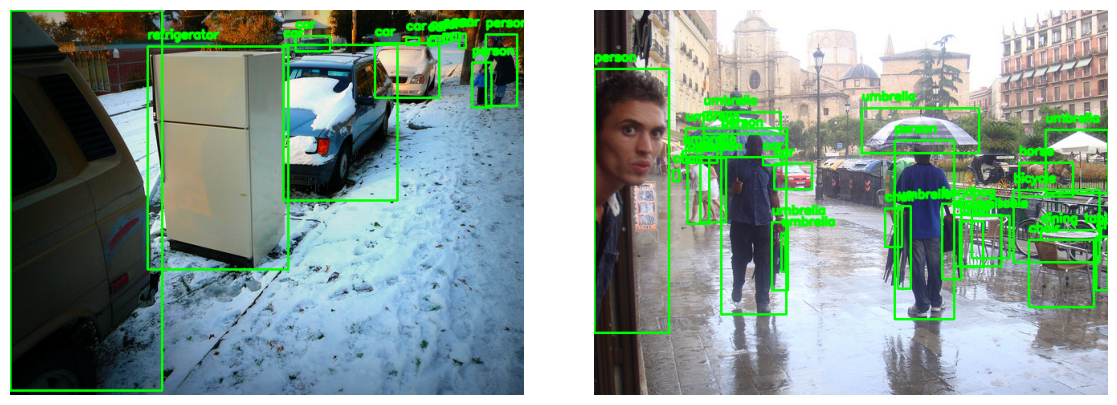

In [ ]:
show_images(images, labels, figsize=(15, 5))